# Data Analysis of all DC/Marvel Heroes and Villans

In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp  
import seaborn as sns
from plotly import express as px
from plotly.subplots import make_subplots
import plotly as py
import plotly.graph_objs as go
import os


In [42]:
info = pd.read_csv('heroes_information2.csv')
powers = pd.read_csv('super_hero_powers.csv')


In [43]:
# see if Nan Values Exists

print(info.isna().any())
print(powers.isna().any())


Unnamed: 0    False
name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher      True
Skin color    False
Alignment     False
Weight         True
dtype: bool
hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
                         ...  
Phoenix Force            False
Molecular Dissipation    False
Vision - Cryo            False
Omnipresent              False
Omniscient               False
Length: 168, dtype: bool


In [44]:
# Add up the null values
print(info.isnull().sum())
print(powers.isnull().sum())

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64
hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64


In [45]:
#Replace The '-' With 'N/A'

info.replace(to_replace= '-', value = 'N/A' , inplace = True)
powers.replace(to_replace= '-', value = 'N/A' , inplace = True)



In [46]:
#Replace The '-' With 'N/A'

info.replace(to_replace= '-', value = 'N/A' , inplace = True)
powers.replace(to_replace= '-', value = 'N/A' , inplace = True)


In [47]:

#Drop the Unamed Coloum in the hero info csv
info.drop('Unnamed: 0', axis=1, inplace = True)

#Replace Negatives value of Height and Weight With 'N/A'
info.replace(-99.0, np.nan, inplace = True)

print(info.shape)
print(info.info())
print(info.head())
print(info.dtypes)

print(info['Publisher'].value_counts())

print(info.Publisher.count())

(734, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      517 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      495 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB
None
          name Gender Eye color               Race Hair color  Height  \
0       A-Bomb   Male    yellow              Human    No Hair   203.0   
1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   191.0   
2     Abin Sur   Male      blue            Ungaran    No Hair   185.0   
3  Abomination   Male     green  Human / Ra

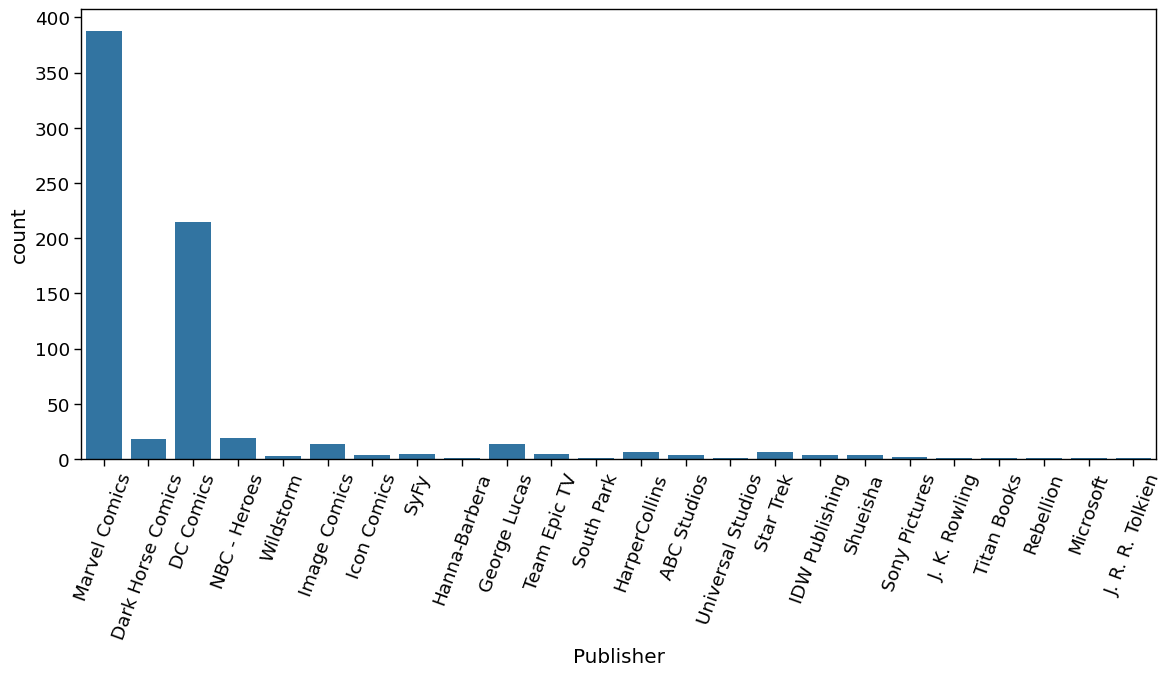

In [48]:
# Bar Graph of publisher by count
fig = plt.figure(figsize=(12,7))
fig.add_subplot(1,1,1)
sns.countplot(x='Publisher', data=info)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()






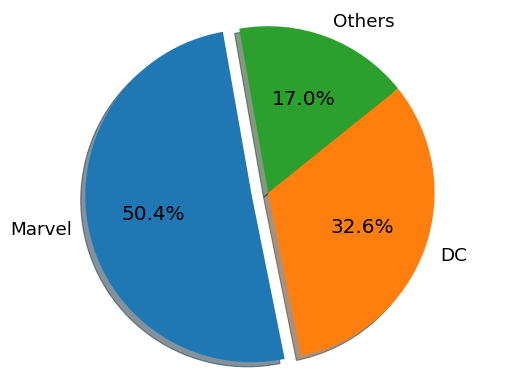

In [49]:
labels = 'Marvel', 'DC', 'Others'
sizes = [388, 251, 131]
explode = (0.1, 0, 0)

fig1 , ax1 = plt.subplots()

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 100)

ax1.axis('equal')
plt.show()




In [50]:
#ALIGNMENT BREAKDOWN
print(info['Alignment'].value_counts())


Alignment
good       496
bad        207
neutral     24
N/A          7
Name: count, dtype: int64


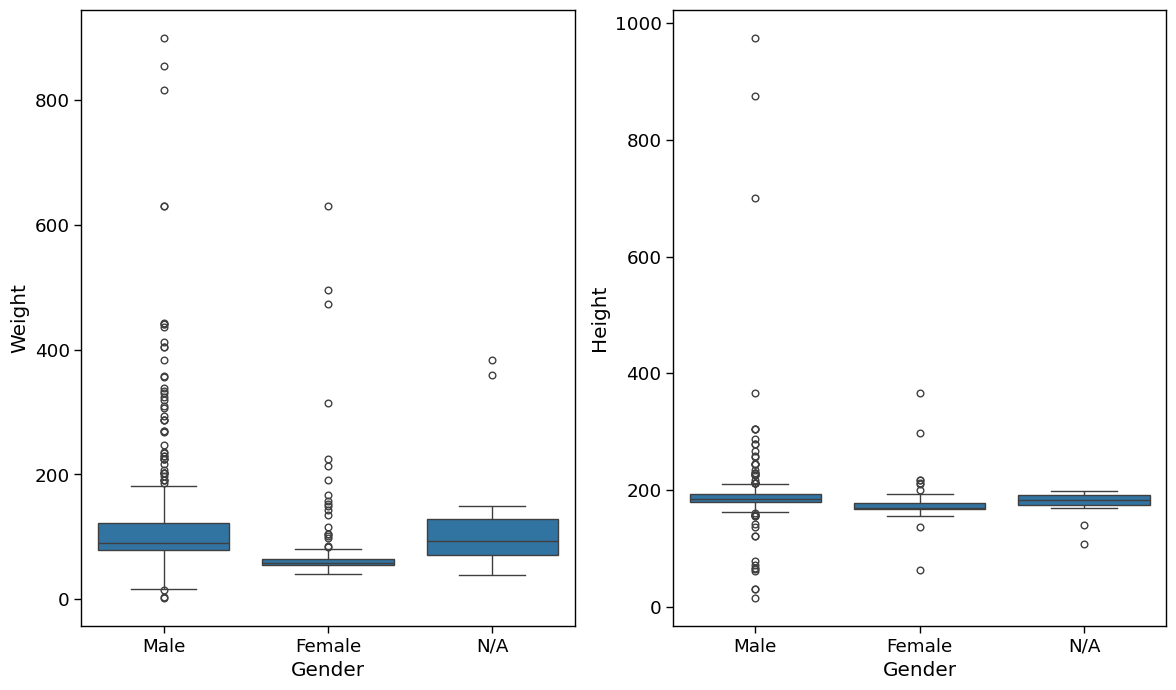

In [51]:
#GENDER BREAKDOWN
#BOX PLOT OF HEIGHT & WEIGHT DISTRIBUTION BY GENDER
fig=plt.figure(figsize=(14,8))
fig.add_subplot(1,2,1)
sns.boxplot(x='Gender',y='Weight',data=info)
fig.add_subplot(1,2,2)
sns.boxplot(x='Gender',y='Height',data=info)
plt.show()

Text(0.5, 1.0, 'Gender count - Marvel Comics')

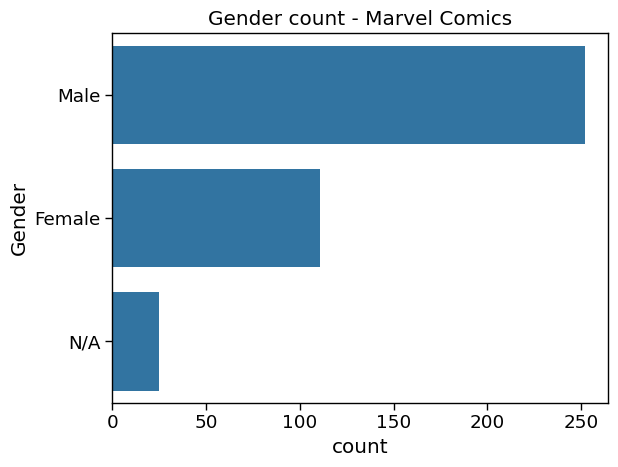

In [52]:
# BAR GRAPH OF GENDER COUNT FOR MARVEL HEROES
sns.countplot(info['Gender'][info['Publisher']=='Marvel Comics'])
plt.title('Gender count - Marvel Comics')



Text(0.5, 1.0, 'Gender Count - DC comics')

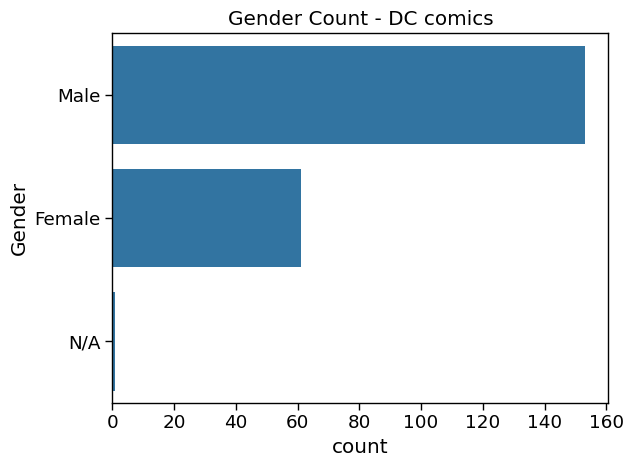

In [53]:
#BAR GRAPH OF GENDER COUNT FOR DC HEROES

sns.countplot(info['Gender'][info['Publisher']=='DC Comics'])
plt.title('Gender Count - DC comics')

In [54]:
# BAR GRAPH OF MALE/FEMALE SUPERHEROES
info_gender = info['Gender'].value_counts().head()

trace = go.Bar(
    y=info_gender.index[::-1],
    x=info_gender.values[::-1],
    orientation='h',
    marker=dict(color=info_gender.values[::-1])
)


layout = dict(
    title='Gender Distribution of Superheroes',
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [55]:

#POWER BREAKDOWN

#SEE IF NaN VALUES EXISTS
print(powers.isna().any())

#THIS ONE ADDS UP ALL THE NULL VALUES
print(powers.isnull().sum())

#TURNS TRUE/FALSE TO A "0" & "1" FORMATION
power=powers*1


hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
                         ...  
Phoenix Force            False
Molecular Dissipation    False
Vision - Cryo            False
Omnipresent              False
Omniscient               False
Length: 168, dtype: bool
hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64


In [56]:
print(power.shape)
print(power.info())
print(power.head())
print(power.dtypes)

(667, 168)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: int32(167), object(1)
memory usage: 440.5+ KB
None
    hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
0      3-D Man        1                    0                   0   
1       A-Bomb        0                    1                   0   
2   Abe Sapien        1                    1                   0   
3     Abin Sur        0                    0                   1   
4  Abomination        0                    1                   0   

   Dimensional Awareness  Cold Resistance  Durability  Stealth  \
0                      0                0           0        0   
1                      0                0           1        0   
2                      0                1           1        0   
3                      0                0           0        0   
4                      0                0           0        0   

   En

In [57]:
#ADDS ALL THE '1' IN THE ROW AND GIVES US A SUM FOR EACH CHARACTER
powers.loc[:, 'no_of_powers'] = powers.iloc[:, 1:].sum(axis=1)


In [58]:
#GETTING A TABLE OF NAME TO POWER NUMBER FROM MOST TO LEAST
most_powers=powers[['hero_names','no_of_powers']]
most_powers=most_powers.sort_values('no_of_powers',ascending=False)

In [59]:
print(most_powers.head(10))

            hero_names  no_of_powers
563            Spectre            49
18               Amazo            44
394  Martian Manhunter            35
370    Living Tribunal            35
388    Man of Miracles            34
139     Captain Marvel            33
597                T-X            33
246           Galactus            32
594             T-1000            32
455      One-Above-All            31


In [60]:
print(np.mean(most_powers.no_of_powers))
print(np.median(most_powers.no_of_powers))

8.806596701649175
7.0


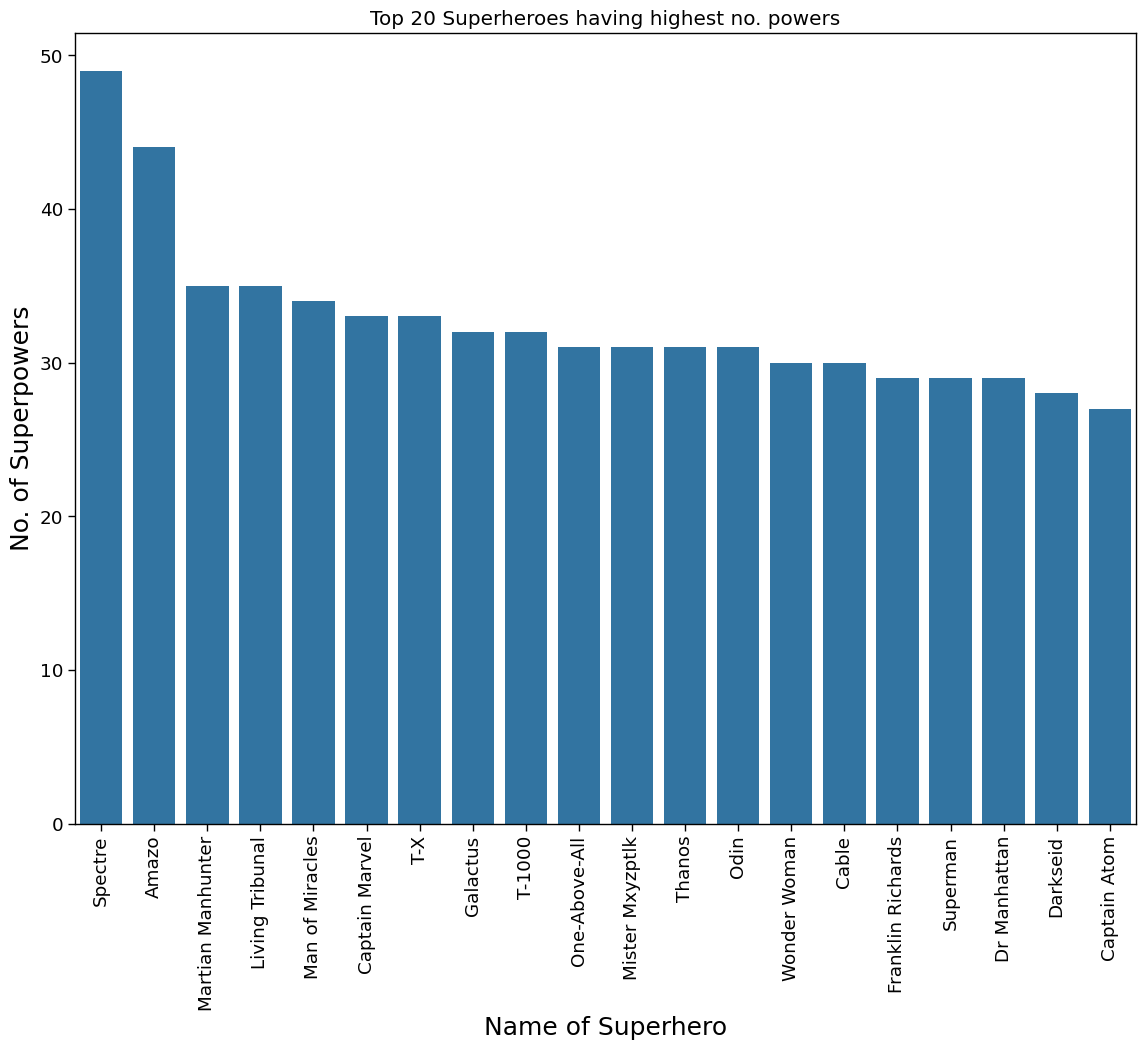

In [61]:
#BAR GRAPH OF THE TOP 20 SUPERHERO POWERS. NUMBER OF POWERS BY NAME OF SUPERHERO
fig, ax = plt.subplots()

fig.set_size_inches(13.7, 10.27)

sns.set_context("paper", font_scale=1.5)
f=sns.barplot(x=most_powers["hero_names"].head(20), y=most_powers['no_of_powers'].head(20), data=most_powers)
f.set_xlabel("Name of Superhero",fontsize=18)
f.set_ylabel("No. of Superpowers",fontsize=18)
f.set_title('Top 20 Superheroes having highest no. powers')
for item in f.get_xticklabels():
    item.set_rotation(90)

In [62]:
#PRINTS HOW MANY CAN FLY
print(len(power[(power['Flight'] == 1)]))

212
